## Predicting sales and number of customers of Rossmann stores with Artificial Neural Network in Keras (Regression)

### Information about the dataset

- Number of inputs: **1 017 209**
- Number of features: **19**
- Dataset: https://www.kaggle.com/c/rossmann-store-sales
- Data fields description: can be found here https://www.kaggle.com/c/rossmann-store-sales

### Importing main libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import warnings; warnings.simplefilter('ignore')

**Loading of the dataset. Two dataset from the website were merged sepately, a merged version is presented**

In [2]:
df_un = pd.read_csv("exported.csv")

**Some data preprocessing**

In [3]:
#convert to datetime
df_un['Date'] = pd.to_datetime(df_un['Date'])

#create a month column from date column
df_un['month'] = df_un['Date'].dt.month

#create seasonal column
conditions = [
    (df_un['month'] == 1) | (df_un['month'] == 2) | (df_un['month'] == 12),
    (df_un['month'] == 3) | (df_un['month'] == 4) | (df_un['month'] == 5),
    (df_un['month'] == 6) | (df_un['month'] == 7) | (df_un['month'] == 8)  
]

choices = ['Winter', 'Spring', 'Summer']
df_un['Season'] = np.select(conditions, choices, default='Autumn')

**Removing values with competion distance = na and days when shops were closed**

In [4]:
df_un = df_un[df_un['CompetitionDistance'].notnull()]
df_un = df_un[df_un['Open']!=0]

**A value to predict** <br>
3rd column - sales, 4th - number of customers

In [5]:
y = df_un.iloc[:, 3] 
y_2 = df_un.iloc[:, 4]

**Creating a separate dataframe with categorical variables to apply get_dummies** <br>
Only some columns from a dataset will be used - DayOfWeek,	Promo,	StateHoliday,	SchoolHoliday,	StoreType,	Assortment,	month,	Season


In [6]:
#indexes of columns with and without categorical variables
col_list = [1,6,7,8,9,10,19,20]
no_cat_var = [11]

df_un_cat = df_un.iloc[:, col_list]
df_un_non_cat = df_un.iloc[:, no_cat_var]

**Convert some variables to "category" so get_dummies encodes it**

In [7]:
#conversion so get_dummies works
df_un_cat['Promo']= df_un_cat['Promo'].astype('category')
df_un_cat['SchoolHoliday'] = df_un_cat['SchoolHoliday'].astype('category')
df_un_cat['month']= df_un_cat['month'].astype('category')
df_un_cat['DayOfWeek']= df_un_cat['DayOfWeek'].astype('category')

**Applying get_dummies** <br/>
Dropping first dummy column is important to avoid collinearity, so drop_first is set to True

In [8]:
df = pd.get_dummies(df_un_cat, drop_first=True)

In [9]:
pd.options.display.max_columns = None

In [10]:
df.head()

,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Promo_1,StateHoliday_a,StateHoliday_b,StateHoliday_c,SchoolHoliday_1,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Season_Spring,Season_Summer,Season_Winter
1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**Adding continuos variables to encoded categorical**

In [11]:
X = pd.merge(df, df_un_non_cat, left_index=True, right_index=True)

**Final dataset**

In [12]:
X.head()

,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Promo_1,StateHoliday_a,StateHoliday_b,StateHoliday_c,SchoolHoliday_1,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Season_Spring,Season_Summer,Season_Winter,CompetitionDistance
1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,4610.0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4610.0
3,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4610.0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4610.0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4610.0


### Creation of a Neural Network

**Train/test split**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2)

**Feature Scaling**

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Importing the Keras libraries and packages**

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


### Predicting sales of Rossmann shops per day

**How the model will look like:** <br/>
5 layers, each has 96 neurons, small dropout to prevent overfitting, relu as an activator, mean squared error as loss function, adam as an optimizer, 15 epochs.

In [16]:
# Initialising the ANN
model = Sequential()    
model.add(Dense(units = 96, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
model.add(Dropout(p = 0.1))
model.add(Dense(units = 96, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.1))
model.add(Dense(units = 96, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.1))
model.add(Dense(units = 96, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.1))
model.add(Dense(units = 96, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.1))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape'])
history = model.fit(X_train, y_train, batch_size = 10000, epochs = 15)

Epoch 1/15
673764/673764 [==============================] - 13s 19us/step - loss: 52987611.2091 - mean_squared_error: 52987611.2091 - mean_absolute_error: 6544.9943 - mean_absolute_percentage_error: 26674004.5298
Epoch 2/15
673764/673764 [==============================] - 14s 21us/step - loss: 9117003.9522 - mean_squared_error: 9117003.9522 - mean_absolute_error: 2195.7987 - mean_absolute_percentage_error: 461463964.4931
Epoch 3/15
673764/673764 [==============================] - 13s 20us/step - loss: 7887833.1973 - mean_squared_error: 7887833.1973 - mean_absolute_error: 2046.2621 - mean_absolute_percentage_error: 452572975.5331
Epoch 4/15
673764/673764 [==============================] - 13s 20us/step - loss: 7785916.8853 - mean_squared_error: 7785916.8853 - mean_absolute_error: 2030.5539 - mean_absolute_percentage_error: 443062738.4014
Epoch 5/15
673764/673764 [==============================] - 15s 23us/step - loss: 7734546.3853 - mean_squared_error: 7734546.3853 - mean_absolute_error

**MSE plot**

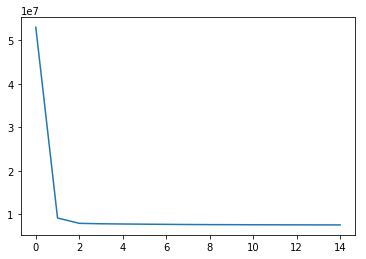

In [17]:
plt.plot(history.history['mean_squared_error'])

**MAE plot**

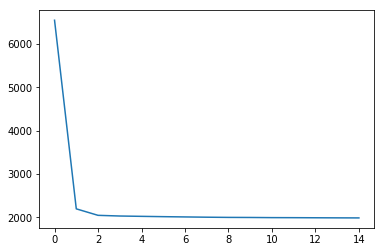

In [18]:
plt.plot(history.history['mean_absolute_error'])

**R-squared of a model**

In [19]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.2669489140493173

**MSE of a model**

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

6949635.98763258

**MAE of a model**

In [21]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

1911.8552002898136

**A table that compares real and predicted values**

In [22]:
final_preds = []
for pred in y_pred:
    final_preds.append(pred[0])

y_test_pr = []
for pred in y_test:
    y_test_pr.append(pred)

d = {'y_test': y_test_pr, 'final_preds': final_preds}
pd.DataFrame(data=d).round(0)[:10]

,y_test,final_preds
0,6397,6027.0
1,8123,6485.0
2,10168,7633.0
3,7270,6309.0
4,7757,5395.0
5,5626,6998.0
6,3724,5803.0
7,13033,9354.0
8,6674,6813.0
9,13137,7927.0


### Predicting customers of Rossmann shops per day

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y_2, test_size = 0.2)

**Feature Scaling**

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
# Initialising the ANN
model = Sequential()    
model.add(Dense(units = 96, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
model.add(Dropout(p = 0.1))
model.add(Dense(units = 96, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.1))
model.add(Dense(units = 96, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.1))
model.add(Dense(units = 96, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.1))
model.add(Dense(units = 96, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.1))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape'])
history = model.fit(X_train, y_train, batch_size = 10000, epochs = 15)

Epoch 1/15
673764/673764 [==============================] - 15s 22us/step - loss: 594856.2430 - mean_squared_error: 594856.2430 - mean_absolute_error: 646.6281 - mean_absolute_percentage_error: 11562664.0900 - loss: 744521.4668 - mean_squared_error: 744521.4668 - mean_absolute_error: 
Epoch 2/15
673764/673764 [==============================] - 13s 19us/step - loss: 128110.0609 - mean_squared_error: 128110.0609 - mean_absolute_error: 243.9137 - mean_absolute_percentage_error: 49525179.9691
Epoch 3/15
673764/673764 [==============================] - 13s 19us/step - loss: 120119.1534 - mean_squared_error: 120119.1534 - mean_absolute_error: 238.2204 - mean_absolute_percentage_error: 51319970.3562
Epoch 4/15
673764/673764 [==============================] - 13s 19us/step - loss: 118889.0103 - mean_squared_error: 118889.0103 - mean_absolute_error: 236.8831 - mean_absolute_percentage_error: 51751841.86489s - loss: 119703.7682 - mean_
Epoch 5/15
673764/673764 [==============================] - 

**R-squared of a model**

In [33]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.3175307068493741

**MSE of a model**

In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

108527.08177650992

**MAE of a model**

In [35]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

225.10123566703268

**A table that compares real and predicted values**

In [36]:
final_preds = []
for pred in y_pred:
    final_preds.append(pred[0])

y_test_pr = []
for pred in y_test:
    y_test_pr.append(pred)

d = {'y_test': y_test_pr, 'final_preds': final_preds}
pd.DataFrame(data=d).round(0)[:10]

,y_test,final_preds
0,932,627.0
1,1790,846.0
2,617,695.0
3,512,569.0
4,957,812.0
5,556,577.0
6,887,869.0
7,330,613.0
8,421,801.0
9,743,576.0


### Summary

Model, that predicts number of customers, does a better job than a model that predicts sales. Moreover, customers model predict with an error 200 customers on average, while sales model predicts with an error around 1900 euros.